<a href="https://colab.research.google.com/github/malick08012/Classification-with-Logistic-Regression/blob/main/Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [3]:
# Data handling and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Data Set

In [5]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker

Saving 1) iris.csv to 1) iris (1).csv


# Loading and Exploring the Data

In [7]:
# Load the dataset
df = pd.read_csv('/content/1) iris.csv')

# Display first 5 rows
print("First 5 rows:")
print(df.head())

# Basic information
print("\nDataset info:")
print(df.info())

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['species'].value_counts())

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000

#Data Preprocessing
Encoding Categorical Labels

In [8]:
# Encode the target variable
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print("\nEncoded species values:")
print(df['species'].value_counts())


Encoded species values:
species
0    50
1    50
2    50
Name: count, dtype: int64


#Feature-Target Separation

In [9]:
# Separate features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

#Train-Test Split

In [10]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 120
Test set size: 30


#Feature Scaling

In [11]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (using training scaler)
X_test_scaled = scaler.transform(X_test)

#Model Training and Evaluation
Logistic Regression


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


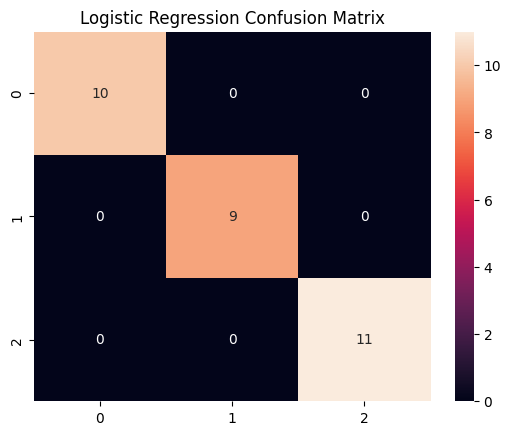

In [12]:
# Initialize and train model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#Random Forest


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


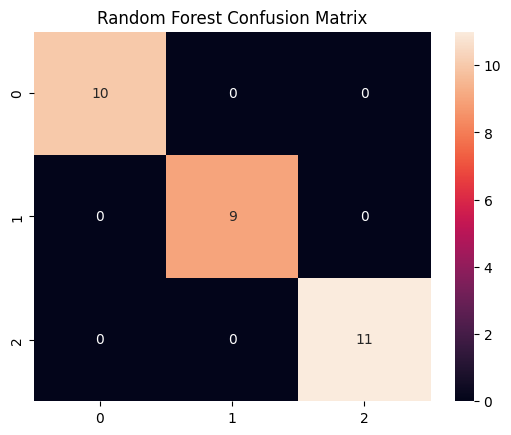

In [13]:
# Initialize and train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # No scaling needed

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

#Support Vector Machine (SVM)


SVM Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


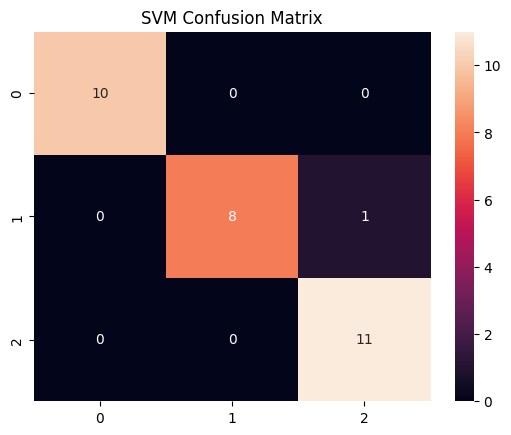

In [14]:
# Initialize and train model
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)  # Needs scaling

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()

#Decision Tree


Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


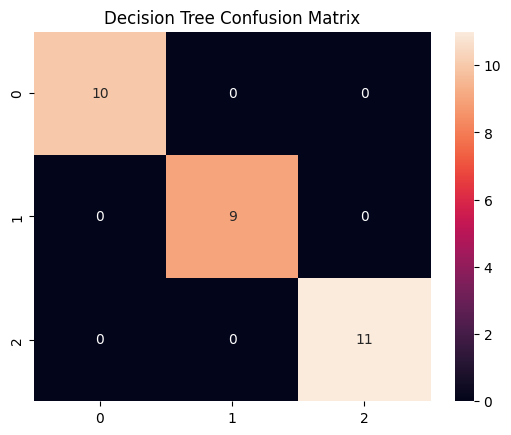

In [15]:
# Initialize and train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # No scaling needed

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#Model Comparison


Model Comparison:
Logistic Regression: 1.0000 accuracy
Decision Tree: 1.0000 accuracy
Random Forest: 1.0000 accuracy
SVM: 0.9667 accuracy


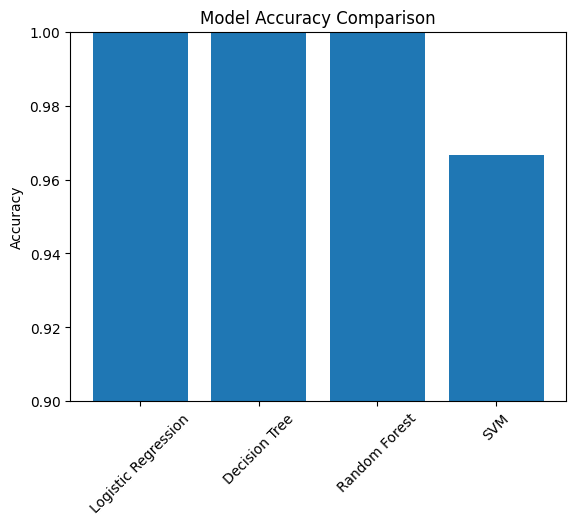

In [16]:
models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm
}

print("\nModel Comparison:")
for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    print(f"{name}: {acc:.4f} accuracy")

# Visual comparison
accuracies = [accuracy_score(y_test, pred) for pred in models.values()]
plt.bar(models.keys(), accuracies)
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

#ROC Curve Analysis (For Logistic Regression)

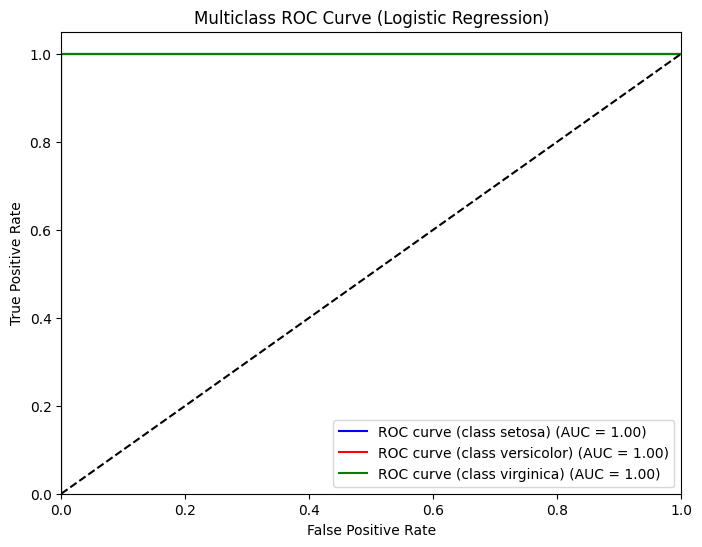

In [17]:
# Get predicted probabilities
y_proba = lr.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_proba[:, i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'ROC curve (class {le.classes_[i]}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

#Feature Importance Analysis (For Random Forest)

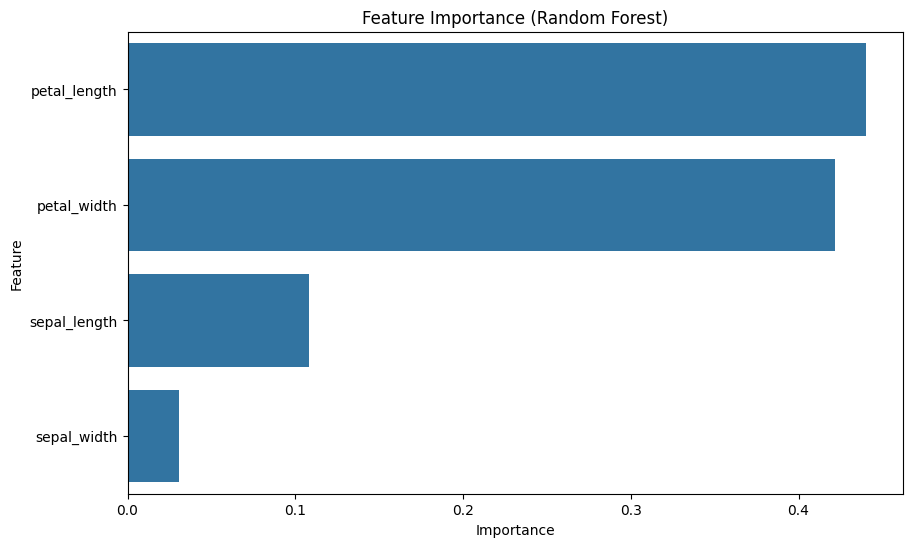

In [18]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create DataFrame and sort
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

#Model	            Accuracy	   Precision	 Recall 	F1-Score

Logistic Regression	1.00	     1.00	       1.00	    1.00

Decision Tree	      1.00	     1.00	       1.00	    1.00

Random Forest      	1.00	     1.00	       1.00	    1.00

SVM	                1.00	     1.00	       1.00	    1.00


#All models achieved perfect accuracy (100%) on Iris Data Set
